### BIGQUERY

In [6]:
#pip install gcloud
#pip install google.cloud
#pip install google.cloud.bigquery
#pip install --upgrade google-cloud-bigquery
#!pip install google-cloud-bigquery-storage
#!pip install pyarrow
#!pip install google-auth

In [8]:
import gcloud
import google.cloud
import google.cloud.bigquery
import pyarrow
import google.auth


In [9]:
%load_ext google.cloud.bigquery

In [10]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/Guillermo/Desktop/ESTUDIOS/Data Science Bootcamp/Projects/4. Capstone/MySQL-d83a40a60a1b.json"

In [83]:
%%bigquery --use_rest_api zipcodes_2017
SELECT *
FROM bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr

Downloading: 100%|██████████| 33120/33120 [01:22<00:00, 399.92rows/s]


### EXPLORATORY DATA VISUALIZATION 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

### 0. Dataframe and missing values

#### Quick overview of missing values in the dataframe:

In [270]:
# Number of rows and columns in the dataframe 
print('The number of observations is {}'.format(zipcodes_2017.shape[0]))
print('The number of variables is {}'.format(zipcodes_2017.shape[1]))

print('    ')

# Total number of missing values in the training set
print('The total number of missing values is {}.'.format(zipcodes_2017.isna().sum().sum()))

# Total number of rows with missing values. 
print('The number of rows with missing values is {}.'.format(zipcodes_2017.shape[0] - zipcodes_2017.dropna().shape[0]))

# Total number of features with missing values.
print('The number of features with missing values is {}'.format(zipcodes_2017.isnull().sum().count()))

The number of observations is 33120
The number of variables is 263
    
The total number of missing values is 382245.
The number of rows with missing values is 33120.
The number of features with missing values is 263


#### Every variable and observation has at least a missing value.

#### Let´s have a look at how the distribution of missing values looks like.

Text(0, 0.5, 'Variables')

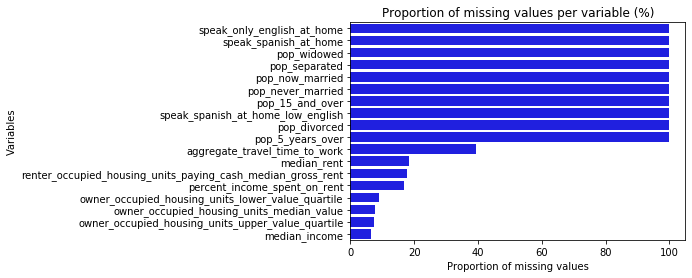

In [106]:
df1 = pd.DataFrame(round(((zipcodes_2017.isna().sum())/zipcodes_2017.shape[0])*100,2)).reset_index()
df1.rename(columns = {'index':'variables', 0:'missing_values'}, inplace = True)
df1 = df1[df1['missing_values'] > 3].sort_values(ascending = False, by = 'missing_values')
sns.barplot(x = 'missing_values', y = 'variables', data = df1, color = 'b')
plt.title('Proportion of missing values per variable (%)', loc = 'center')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')

### 1. Gender

#### In order to have a first glance on whether there are differences in renting patters between males and females, we plot the average number of males and females in each median rent deciles.

Text(0, 0.5, 'Average number by gender')

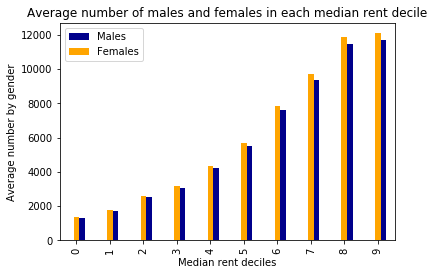

In [287]:
# Calcualte median_rent quantiles
zipcodes_2017['median_rent_bin'] = pd.qcut(zipcodes_2017['median_rent'],  q = 10, labels = False)

# Plot the graph
x = zipcodes_2017.groupby('median_rent_bin')[['female_pop', 'male_pop']].mean().reset_index().plot.bar(color = ['darkblue','orange'])
plt.legend(labels = ["Males","Females"])

plt.title('Average number of males and females in each median rent decile', loc = 'center')
plt.xlabel('Median rent deciles')
plt.ylabel('Average number by gender')

#### We can see that there are no big differences in any of the deciles. However, we can see that the differences slightly increases as the rent increases. This is probably due to higher life expectancy among women, as it is also reasonable to suggest that income and rent increase as workers accumulate experience and higher wages.

#### We can try to look at the impact of gender in a different way. We calculate the difference between the number of men and women in each zipcode. Afterwards, we check the correlation between this variable and the median_rent. As the number of men and women is roughly equal, we will get a symmetric distribution. 

Text(0, 0.5, 'Median rent')

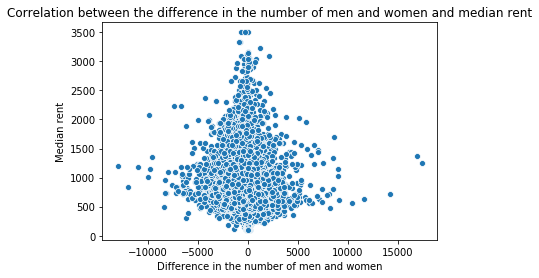

In [246]:
# Create variable that captures different number of men and women
zipcodes_2017['gen_dif'] = zipcodes_2017['male_pop'] - zipcodes_2017['female_pop']

sns.scatterplot(x = 'gen_dif', y = 'median_rent', data = zipcodes_2017)
plt.title('Correlation between the difference in the number of men and women and median rent', loc = 'center')
plt.xlabel('Difference in the number of men and women')
plt.ylabel('Median rent')

#### We can see a clear patters in the graph above. As the difference between the number of men and women in a particular zipcode decreases, the median rent increases. This can be due to several factors: married couples or families with children tend to have higher rents, older people have higher income and thus higher rents... We will investingate these.

### 2. Age

#### We now try to visualize the effects of age in median rent. We start by checking a well known patter, the fact that income increases with age as workers accumulate experience.

Text(0, 0.5, 'Median income')

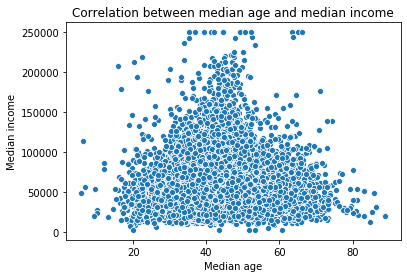

In [248]:
sns.scatterplot(x = 'median_age', y = 'median_income', data = zipcodes_2017)
plt.title('Correlation between median age and median income', loc = 'center')
plt.xlabel('Median age')
plt.ylabel('Median income')

#### We can clearly see the expected pattern above. The median rent decreases smoothly as the number of retirees in a particular zipcode increases and increases as people grow older. However, again we have to think about potential confounding factors, maybe parents move to smaller appartments as their children leave the household.

#### Let´s check if this behavious is mimicked when we plot median age against median rent. This can provide us insight in how import disponsable income is against other possible explanations.

Text(0, 0.5, 'Median rent')

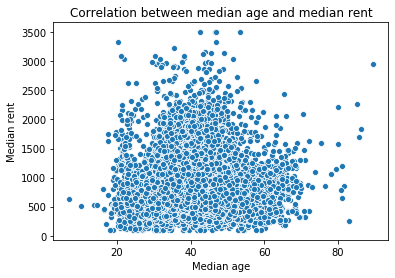

In [249]:
sns.scatterplot(x = 'median_age', y = 'median_rent', data = zipcodes_2017)
plt.title('Correlation between median age and median rent', loc = 'center')
plt.xlabel('Median age')
plt.ylabel('Median rent')

#### We can see a similar patter between both relationships, suggesting an important conexion between income and rent. However, it is not strictly equal. We can see that many people in their 20s and 30s have higher rents that we would expect given their income. Intuitively, family structure could explain this difference, as it could be the case that having a family increases rent. For example as you may need a bigger house for more people.  

### 3. Family structure

#### We start by the most clear choice, the number of children. We split the number of children per zipcode into quantiles and plot it. 

Text(0, 0.5, 'Median rent')

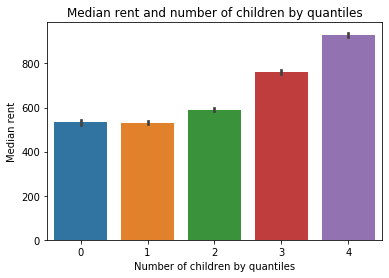

In [250]:
zipcodes_2017['children_bin'] = pd.qcut(zipcodes_2017['children'],  q = 5, labels = False) 
sns.barplot(x = 'children_bin', y = 'median_rent', data = zipcodes_2017)
plt.title('Median rent and number of children by quantiles', loc = 'center')
plt.xlabel('Number of children by quantiles')
plt.ylabel('Median rent')

#### We have looked at the effect in the number of children. The census data allows as to look at the difference between single-parent and two-parent households. This may help us isolate the effect of just having children from having two incomes in the household. 

#### To analyze this, we create three new variables:
#### 1. Number of one parent families with young children.
#### 2. Difference in the number of single-parent and two-parent households per zipcode.
#### 3. Dummy variable (two_parents) that takes value 1 if there are more two-parent families than single-parent ones and 0 otherwise.

#### Last, we create a boxplot comparing zipcodes in which single-parent families are prevalent with the ones in which two-parent are instead.

Text(0, 0.5, 'Median rent')

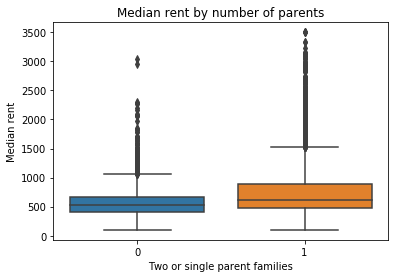

In [260]:
# Create new variables
zipcodes_2017['one_parent_families_with_young_children'] = zipcodes_2017['families_with_young_children'] - zipcodes_2017['two_parent_families_with_young_children']
zipcodes_2017['dif_one_two_parents'] = zipcodes_2017['two_parent_families_with_young_children'] - zipcodes_2017['one_parent_families_with_young_children']

zipcodes_2017['two_parents'] = 3
zipcodes_2017['two_parents'] = zipcodes_2017['dif_one_two_parents'].apply(lambda x: 1 if x > 0 else 0)

# Graph the boxplot
sns.boxplot(x = 'two_parents', y = 'median_rent', data = zipcodes_2017)
plt.title('Median rent by number of parents', loc = 'center')
plt.xlabel('Two or single parent families')
plt.ylabel('Median rent')

#### As we can see, two-parent households have higher median rents.

#### In order to get a grasp of the impact that single-parenthood have in rents we can check the plot below. 

Text(0, 0.5, 'Median rent')

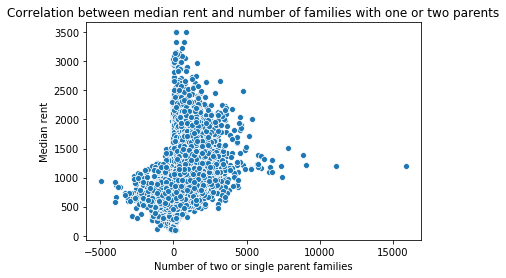

In [261]:
sns.scatterplot(x = 'dif_one_two_parents', y = 'median_rent', data = zipcodes_2017)
plt.title('Correlation between median rent and number of families with one or two parents', loc = 'center')
plt.xlabel('Number of two or single parent families')
plt.ylabel('Median rent')

#### We can seet the strong contrast in median rent between households with a prevalence of single-parent families and the ones with a prevalence of two-parent households.

### 4. Commuting

#### Let´s start by checking the relationship between the aggregate commuting time and rent.

Text(0, 0.5, 'Aggregate commuting time')

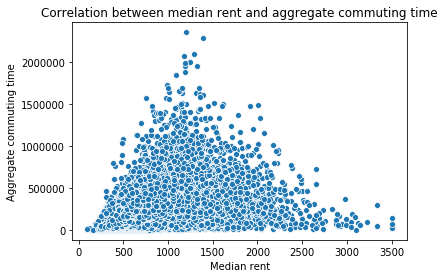

In [123]:
sns.scatterplot(y = 'aggregate_travel_time_to_work', x = 'median_rent', data = zipcodes_2017)
plt.title('Correlation between median rent and aggregate commuting time', loc = 'center')
plt.xlabel('Median rent')
plt.ylabel('Aggregate commuting time')

#### We can see above how as rent increases commuting time tends to decrease unless the median rent are very small. The reason for this could be that poorer households prefer to save commuting costs (metro tickets, etc) or that they look for more local jobs. Also, a part of them acutally have rents close to 0, this people are probably not working (living with their parents).

#### Is the kind of commuting important? We can now have a look at commuters by public transportation. 


Text(0, 0.5, 'Aggregate commuting time')

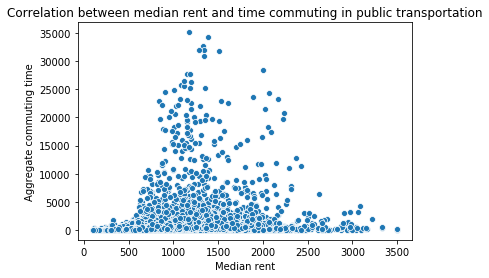

In [264]:
sns.scatterplot(y = 'commuters_by_public_transportation', x = 'median_rent', data = zipcodes_2017)
plt.title('Correlation between median rent and time commuting in public transportation', loc = 'center')
plt.xlabel('Median rent')
plt.ylabel('Aggregate commuting time')

#### We can see a similar pattern that in the first graph above. This probably speaks to the importance people give to finding housing close to their workplace. Let´s try to gather more information by looking at people that walk to work.

Text(0, 0.5, 'Walks to work')

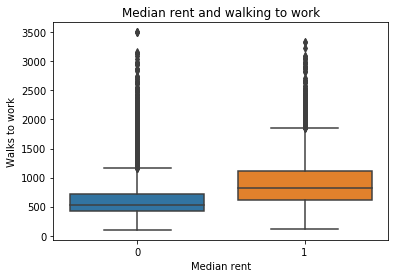

In [265]:
zipcodes_2017['walked_to_work_dummy'] = zipcodes_2017['walked_to_work'].apply(lambda x: 1 if x > zipcodes_2017['walked_to_work'].mean() else 0)
sns.boxplot(x = 'walked_to_work_dummy', y = 'median_rent', data = zipcodes_2017)
plt.title('Median rent and walking to work', loc = 'center')
plt.xlabel('Median rent')
plt.ylabel('Walks to work')

#### Now we can see a substantial difference between people who walk to work and does who doesn´t. 

#### Looks like just redcuing the commuting time can have a big effect in rents. Also, it looks like commuting public transportation is more prevalen for those with lower commuting times, even though there is a part of the population that will still use it.

### Glosary 

#### median_rent: the median contract rent within a geographic area. The contract rent is the monthly rent agreed to or contracted for, regardless of any furnishings, utilities, fees, meals, or services that may be included. 
#### aggregate_travel_time_to_work: the total number of minutes every worker in a geographic area over the age of 16 who did not work from home spent spent commuting to work in one day
#### nonfamily_households: a householder living alone or with nonrelatives only.
#### family_households: a family consists of a householder and one or more other people living in the same household who are related to the householder by birth, marriage, or adoption.
#### families_with_young_children: families with young children (under 6 years of age)
#### commuters_by_public_transportation: the number of workers age 16 years and over within a geographic area who primarily traveled to work by public transportation.